## Note

Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = (r"C:\Users\geofr\Assignment\cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe to be added to in for loop
weather_df = pd.DataFrame()
weather_df["City"] = ""
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = "" 
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

# Start the notification
print("Retrieving Data")
print("--------------------------")

# Loop through all of the cities
for x in np.arange(len(cities)):

    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        
        # Current wheather statistics from URL of the current city
        current_weather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weather_df.loc[x, "City"] = current_weather["name"]
        weather_df.loc[x, "Cloudiness"] = current_weather["clouds"]["all"]            
        weather_df.loc[x, "Country"] = current_weather["sys"]["country"]
        weather_df.loc[x, "Date"] = current_weather["dt"]
        weather_df.loc[x, "Humidity"] = current_weather["main"]["humidity"]
        weather_df.loc[x, "Lat"] = current_weather["coord"]["lat"]
        weather_df.loc[x, "Lng"] = current_weather["coord"]["lon"]
        weather_df.loc[x, "Max Temp"] = current_weather["main"]["temp_max"]
        weather_df.loc[x, "Wind Speed"] = current_weather["wind"]["speed"]
    
    # Display error message if city is not found
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data retrieval process message
print("-------------------------")
print("Retrieval Complete")
print("-------------------------")

# Drop the rows that have been added with no data or partial data
weather_data = weather_df.dropna()

Retrieving Data
--------------------------
Processing record 0 | illoqqortoormiut
City not found. Skipping...
Processing record 1 | avarua
Processing record 2 | imeni poliny osipenko
Processing record 3 | thinadhoo
Processing record 4 | taraz
Processing record 5 | hilo
Processing record 6 | ancud
Processing record 7 | xadani
City not found. Skipping...
Processing record 8 | bredasdorp
Processing record 9 | rikitea
Processing record 10 | tsihombe
City not found. Skipping...
Processing record 11 | bacong
Processing record 12 | saint-philippe
Processing record 13 | kapaa
Processing record 14 | saint-augustin
Processing record 15 | dombarovskiy
Processing record 16 | cape town
Processing record 17 | rapid valley
Processing record 18 | whitianga
Processing record 19 | busselton
Processing record 20 | esperance
Processing record 21 | mokrousovo
Processing record 22 | georgetown
Processing record 23 | yar-sale
Processing record 24 | mahebourg
Processing record 25 | clyde river
Processing reco

Processing record 229 | san felipe
Processing record 230 | belushya guba
City not found. Skipping...
Processing record 231 | alice springs
Processing record 232 | san patricio
Processing record 233 | bentiu
City not found. Skipping...
Processing record 234 | sao filipe
Processing record 235 | cabo san lucas
Processing record 236 | fereydun kenar
Processing record 237 | oboyan
Processing record 238 | nikolskoye
Processing record 239 | cairns
Processing record 240 | kaniama
Processing record 241 | saint anthony
Processing record 242 | keningau
Processing record 243 | gornozavodsk
Processing record 244 | grand gaube
Processing record 245 | pevek
Processing record 246 | merauke
Processing record 247 | camopi
Processing record 248 | fortuna
Processing record 249 | fort nelson
Processing record 250 | bako
Processing record 251 | suoyarvi
Processing record 252 | krasnogorskoye
Processing record 253 | touros
Processing record 254 | portland
Processing record 255 | mocuba
Processing record 256 

Processing record 452 | peniche
Processing record 453 | buala
Processing record 454 | aswan
Processing record 455 | sorvag
City not found. Skipping...
Processing record 456 | tamandare
Processing record 457 | tottori
Processing record 458 | saint-louis
Processing record 459 | nanyang
Processing record 460 | dukat
Processing record 461 | chihuahua
Processing record 462 | magadan
Processing record 463 | srinagar
Processing record 464 | muzhi
Processing record 465 | staryy nadym
Processing record 466 | aparecida do taboado
Processing record 467 | karaton
Processing record 468 | buin
Processing record 469 | muzhappilangad
City not found. Skipping...
Processing record 470 | palmer
Processing record 471 | foumban
Processing record 472 | savanur
Processing record 473 | innisfail
Processing record 474 | fevralsk
City not found. Skipping...
Processing record 475 | carutapera
Processing record 476 | atbasar
Processing record 477 | laurens
Processing record 478 | mangrol
Processing record 479 | f

### Convert Raw Data to DataFrame
Export the city data into a .csv. Display the DataFrame

In [7]:
# Output to data file 
weather_data.to_csv(output_data_file)

# Display counts of each column
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [8]:
# Display the dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Avarua,16,CK,1562096767,68,-21.21,-159.78,69.8,14.99
2,Imeni Poliny Osipenko,90,RU,1562096820,73,52.42,136.49,56.42,1.36
3,Thinadhoo,97,MV,1562096605,77,0.53,72.93,83.42,10.56
4,Taraz,90,KZ,1562096821,64,42.89,71.39,71.6,6.71
5,Hilo,75,US,1562096821,54,19.71,-155.08,82.4,5.82


## Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

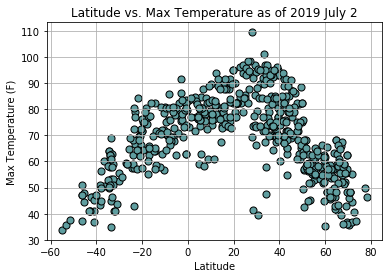

In [12]:
# Scatter plot of latitude vs temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color="cadetblue",
           edgecolors = "k", s = 50)

# Title, axis and labels
plt.title(f"Latitude vs. Max Temperature as of 2019 July 2")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure to the output folder
plt.savefig(r"C:\Users\geofr\Assignment\lat_vs_temp.png")

#### Latitude vs. Humidity Plot

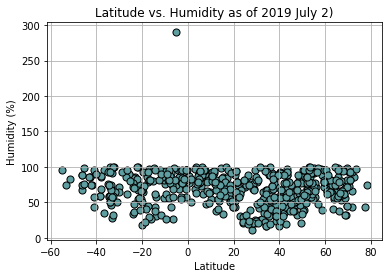

In [13]:
# Scatter plot of latitude vs humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"],color="cadetblue",
           edgecolors = "k", s = 50)

# Title, axis and labels
plt.title("Latitude vs. Humidity as of 2019 July 2)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig(r"C:\Users\geofr\Assignment\lat_vs_hum.png")

#### Latitude vs. Cloudiness Plot

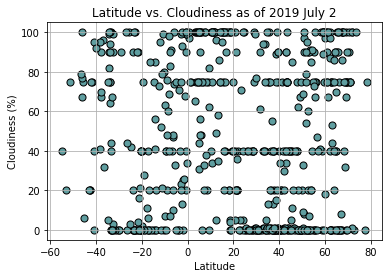

In [14]:
# Scatter plot of latitude vs cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"],color="cadetblue",
           edgecolors = "k", s = 50)

# Title, axis and labels
plt.title("Latitude vs. Cloudiness as of 2019 July 2")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig(r"C:\Users\geofr\Assignment\lat_vs_cloud.png")

#### Latitude vs. Wind Speed Plot

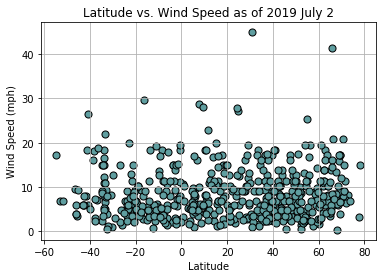

In [15]:
# Scatter plot of latitude vs wind speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"],color="cadetblue",
           edgecolors = "k", s = 50)

# Title, axis and labels
plt.title("Latitude vs. Wind Speed as of 2019 July 2")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure to the output folder
plt.savefig(r"C:\Users\geofr\Assignment\latVwind.png")